00  -   INICIO - Formato de DataFrame
        Datos numerico 100%
        https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

        https://deepnote.com/@a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f

        https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html

        https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
        
        https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [126]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de distribución para cada variable numérica
import matplotlib.ticker as ticker
# ==============================================================================
# Identificador de tipos de Distribucion
# ==============================================================================
from fitter import Fitter, get_common_distributions
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["Embarazos"    , "glucosa"     , "presion_arterial"
                , "grosor_piel" , "insulina"    , "indice_masa_corporal"
                , "FP_diabetes" , "edad"        , "resultado"]


In [ ]:
# SELECCIONAR EL TOP 20 
datos.head(20)

In [13]:
# VER TIPOS DE DATOS Y VALIDAR QUE NO HAYA NULLS - 
datos.info()

# #Limpiar datos
# datos = datos.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Embarazos             768 non-null    int64  
 1   glucosa               768 non-null    int64  
 2   presion_arterial      768 non-null    int64  
 3   grosor_piel           768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   indice_masa_corporal  768 non-null    float64
 6   FP_diabetes           768 non-null    float64
 7   edad                  768 non-null    int64  
 8   resultado             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


00.01       ANALISIS DE LOS DATOS

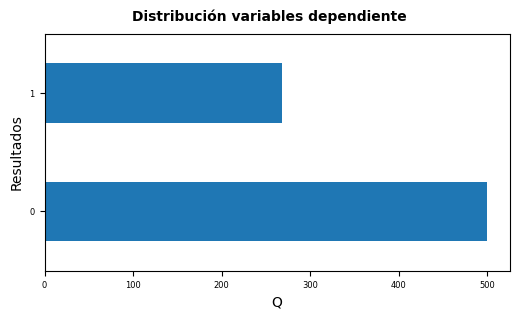

In [42]:

# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
#axes = axes.flat # solo cuando hay mas de 1 espacio de grafico
datos['resultado'].value_counts().plot.barh(ax = axes)

axes.tick_params(labelsize = 6)
axes.set_ylabel("Resultados")
axes.set_xlabel("Q")


plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables dependiente',
             fontsize = 10, fontweight = "bold");

00.01.01    Grafico Histograma de las variables independientes

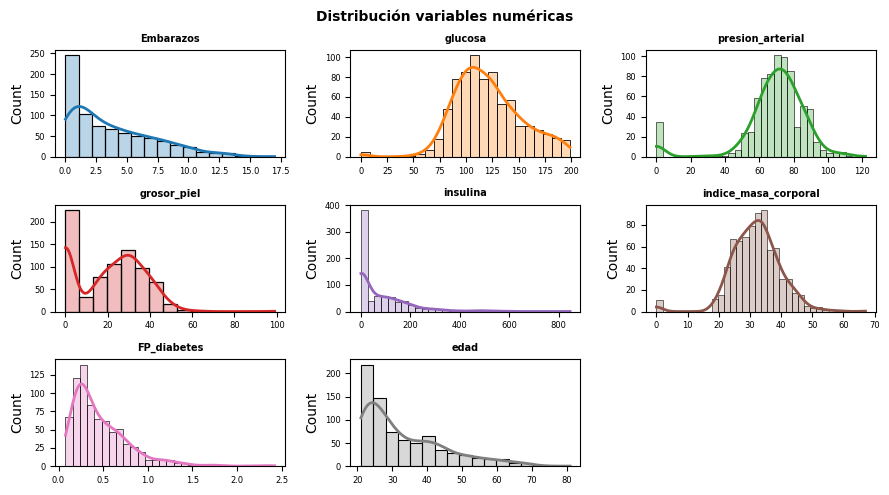

In [20]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('resultado')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum, # dato a calcular
        stat    = "count", # medida a calcular
        kde     = True, # habilitar linea del histograma
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], # formato de colores
        line_kws= {'linewidth': 2}, # grosor de las lineas del histograma
        alpha   = 0.3, # contraste de la barras del histogrma 
        ax      = axes[i] # posicion de la figura en la hoja
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold") # titulo de la figura
    axes[i].tick_params(labelsize = 6) # tamaño de letra del eje Y
    axes[i].set_xlabel("") # nombre del eje x 

for i in [8]:
    fig.delaxes(axes[i])   
    
fig.tight_layout() # extension de la hoja por la extension del espacio
plt.subplots_adjust(top = 0.9) # ajuste de figura respecto a la parte superior de la hoja
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");# titulo de la hoja

00.01.01    Grafico Violin de densidad de relacion variable independientes vs Categorica(dependiente)

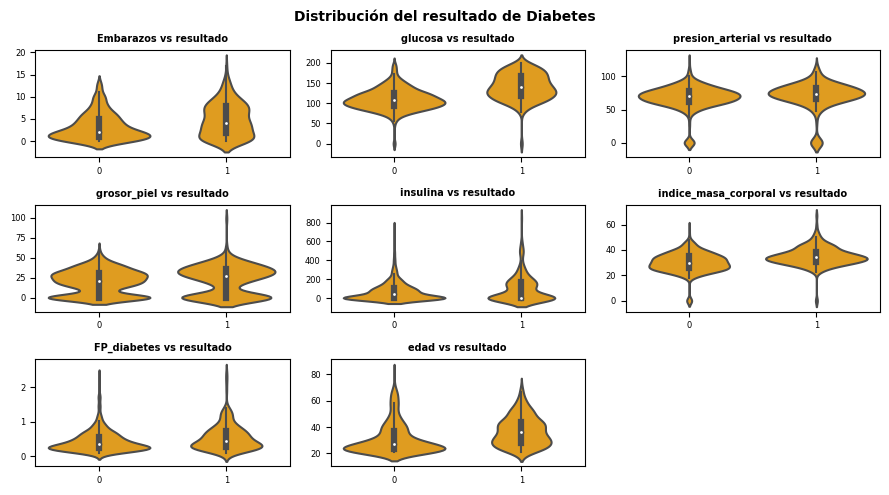

In [25]:
# Gráfico relación entre el precio y cada cada variables cualitativas
import matplotlib.ticker as ticker
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('resultado')

for i, colum in enumerate(columnas_numeric):
    sns.violinplot(
        x     = 'resultado',
        y     = colum,
        data  = datos,
        color = "orange",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs resultado", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del resultado de Diabetes', fontsize = 10, fontweight = "bold");

01  -   Regresión Logística - Statsmodels

01.01       Llamada de libreria
            En conclusión, la 
            Regresión Lineal:
                Es un algoritmo de regresión por lo que la utilizamos para predecir un valor numérico, mientras que la 
            Regresión Logística:
                Es un algoritmo de clasificación por lo que la utilizamos para predecir entre dos opciones.

In [52]:
import statsmodels.api as sm

In [43]:
print("Número de observaciones por clase")
print(datos['resultado'].value_counts())
print("")


Número de observaciones por clase
0    500
1    268
Name: resultado, dtype: int64



01.02       Seteado de datos

In [127]:

datos_xx = datos
datos_yy =datos['resultado']

In [128]:
datos_xx.info()
datos_yy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Embarazos             768 non-null    int64  
 1   glucosa               768 non-null    int64  
 2   presion_arterial      768 non-null    int64  
 3   grosor_piel           768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   indice_masa_corporal  768 non-null    float64
 6   FP_diabetes           768 non-null    float64
 7   edad                  768 non-null    int64  
 8   resultado             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: resultado
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


01.03       Reparto de data - test y train
            random_state    :
                simplemente fija una semilla para el generador de números aleatorios, lo que permite  reproducir la función. Es decir los registros seleccionados seran los mismos en cada ejecucion para el train y el test.
            shuffle         : 
                (que toma el valor True por defecto) especifica si los registros deberán ser desordenados previamente o no.

In [160]:
# Reparto de datos en train y test
# ==============================================================================
trainSize = 0.80
seed = 1234 # semilla(random_state)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_xx.drop('resultado', axis = 'columns'),
                                        datos_yy,
                                        train_size   = trainSize,
                                        random_state = seed,
                                        shuffle      = True
                                    )

In [71]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 733 to 723
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 614 non-null    float64
 1   Embarazos             614 non-null    int64  
 2   glucosa               614 non-null    int64  
 3   presion_arterial      614 non-null    int64  
 4   grosor_piel           614 non-null    int64  
 5   insulina              614 non-null    int64  
 6   indice_masa_corporal  614 non-null    float64
 7   FP_diabetes           614 non-null    float64
 8   edad                  614 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 48.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 200 to 228
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 154 non-null    float64
 1   Embarazos         

In [72]:
y_train.info()
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 614 entries, 733 to 723
Series name: resultado
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB
<class 'pandas.core.series.Series'>
Int64Index: 154 entries, 200 to 228
Series name: resultado
Non-Null Count  Dtype
--------------  -----
154 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


01.04       Entrenamiento del Modelo

In [161]:
# Creación del modelo utilizando matrices como en scikitlearn
import statsmodels.api as sm
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelLR = sm.Logit(endog=y_train, exog=X_train,)
modelLR = modelLR.fit()
print(modelLR.summary())

Optimization terminated successfully.
         Current function value: 0.466913
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              resultado   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                  0.2767
Time:                        21:26:08   Log-Likelihood:                -286.68
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 5.369e-43
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.3873      0.805    -10.415      0.000      -9.966      -6.809

01.05       Prediccion de los datos de testeo

In [164]:
X_test = sm.add_constant(X_test, prepend=True)

targetPredic= modelLR.predict(exog = X_test)
clasificacion = np.where(targetPredic<0.5, 0, 1)
clasificacion

,const,Embarazos,glucosa,presion_arterial,grosor_piel,insulina,indice_masa_corporal,FP_diabetes,edad
200,1.0,0,113,80,16,0,31.0,0.874,21
40,1.0,3,180,64,25,70,34.0,0.271,26
630,1.0,7,114,64,0,0,27.4,0.732,34
356,1.0,1,125,50,40,167,33.3,0.962,28
305,1.0,2,120,76,37,105,39.7,0.215,29
267,1.0,2,128,64,42,0,40.0,1.101,24
351,1.0,4,137,84,0,0,31.2,0.252,30
644,1.0,3,103,72,30,152,27.6,0.730,27
759,1.0,6,190,92,0,0,35.5,0.278,66
157,1.0,1,109,56,21,135,25.2,0.833,23


01.06       Muestra de resultados confusion_matrix

01.06.01       Accuracy_score

In [113]:
from sklearn.metrics import accuracy_score

# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion #,normalize = True
           )
           
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 76.62337662337663%


In [112]:
# probando el modelo con el total de datos
X_test_SM = sm.add_constant(datos_xx.drop('resultado', axis = 'columns'), prepend=True)

targetPredic_sm= modelLR.predict(exog = X_test_SM)
clasificacion_sm = np.where(targetPredic_sm<0.5, 0, 1)
clasificacion_sm
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = datos_yy,
            y_pred    = clasificacion_sm #,normalize = True
           )
           
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 77.99479166666666%


01.06.02       Matris de Confusion

In [114]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(clasificacion, y_test)
df_cm = pd.DataFrame(array)

Text(0.5, 1.0, 'Distribución original')

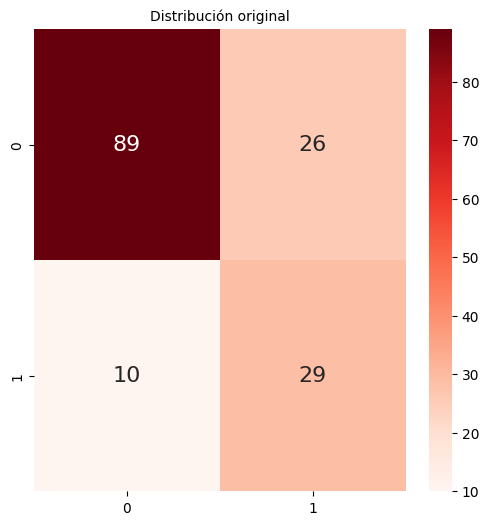

In [115]:

# sns.set(font_scale=1)
# plt.show(sns.heatmap(df_cm, annot = True, annot_kws={"size":16}, cmap='Reds'))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(
    df_cm, 
    annot   = True, 
    annot_kws={"size":16}, 
    fmt       = '.0f',
    cmap    ='Reds'
)
axes.set_title("Distribución original", fontsize = 'medium')

# La matris es una forma visual de ver el acuraccy = 0.7052023121387283


In [94]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    clasificacion,
    y_test
    # rownames=['Real'],
    # colnames=['Predicción']
)
confusion_matrix

resultado,0,1
row_0,,
0,89,26
1,10,29


In [98]:
y_test.value_counts()

0    99
1    55
Name: resultado, dtype: int64

01.06.03       classification_report

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clasificacion))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



01.07       La validación cruzada
            O cross validation, se define como una técnica muy utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre los datos de entrenamiento y prueba.
            Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.

            Aplica el Modelo K veces con donde entrena el modelo con (k-1)/k% como train y compara con el 1/k restante como test, luego alterna con siguiente grupo k y asi con los k grupos formados.
            
            https://deepnote.com/@a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f
            https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

01.07.01    Homologacion de a la libreria scikit-learn
            Pero obviamos las variables independientes que no son significativas encontradas en el anterior modelo. EN LA SECCION 01.04

In [147]:
datos_xx_SL =   datos_xx.drop(['grosor_piel','insulina','edad','resultado'], axis = 'columns')
datos_yy_SL =   datos_yy
datos_xx_SL.info()
datos_yy_SL.info()
datos_yy_SL.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Embarazos             768 non-null    int64  
 1   glucosa               768 non-null    int64  
 2   presion_arterial      768 non-null    int64  
 3   indice_masa_corporal  768 non-null    float64
 4   FP_diabetes           768 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 30.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: resultado
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


0    500
1    268
Name: resultado, dtype: int64

In [148]:
trainSize = 0.80
seed = 1 # semilla(random_state)
from sklearn.model_selection import train_test_split
X_train_SL, X_test_SL, y_train_SL, y_test_SL = train_test_split(
                                        datos_xx_SL,
                                        datos_yy_SL,
                                        train_size   = trainSize,
                                        random_state = seed,
                                        shuffle      = True
                                    )

from sklearn.linear_model import LogisticRegression

modelLR_SL = LogisticRegression()
modelLR_SL.fit(X_train_SL, y_train_SL)

LogisticRegression()

In [149]:
from sklearn.metrics import accuracy_score

predictions_SL = modelLR_SL.predict(X_test_SL)
print(accuracy_score( predictions_SL,y_test_SL))

0.7922077922077922


01.07.02    Ejecucion de Kfold
            con el modelo nuevo excluido de variables no significativas.

In [152]:
from sklearn import model_selection
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True) # trae el seed(semilla del punto 01.03)
cv_results = model_selection.cross_val_score(modelLR_SL, datos_xx_SL, datos_yy_SL, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

In [153]:
print(msg)
print(cv_results)
cv_results.mean()

Logistic Regression: 0.770779 (0.047176)
[0.79220779 0.79220779 0.80519481 0.67532468 0.80519481 0.71428571
 0.84415584 0.77922078 0.73684211 0.76315789]


0.7707792207792208

01.08       Prueba o Uso

In [154]:
datos_xx_SL.head(1)
datos_xx.head(1)

,Embarazos,glucosa,presion_arterial,grosor_piel,insulina,indice_masa_corporal,FP_diabetes,edad,resultado
0,6,148,72,35,0,33.6,0.627,50,1


01.08.01    Probando el Modelo realizado por StatModels
            Se le agrega la constante (const : 1.0) y la condicional de <0.5 , 0, 1 debido a que el modelo regresa una probabilidad

In [168]:

X_new = pd.DataFrame({	#'resultado': [132500],	
						'const':[1.0], 
						'Embarazos': [7],	
						'glucosa': [150],	
						'presion_arterial': [80],
						'grosor_piel': [50],	
						'insulina': [0],	
						'indice_masa_corporal':	[29.5],
						'FP_diabetes': [0.589],
						'edad': [100]
						})
np.where(modelLR.predict(X_new)<0.5, 0, 1)


array([1])

01.08.02    Probando el Modelo realizado por Scikit-learn
            No se le agrega nada, ya la predicion te devuelve el valor seteado.

In [167]:
X_new = pd.DataFrame({	#'resultado': [132500],	
						'Embarazos': [7],	
						'glucosa': [150],	
						'presion_arterial': [80],
						#'grosor_piel': [50],	
						#'insulina': [0],	
						'indice_masa_corporal':	[29.5],
						'FP_diabetes': [0.589]
						#'edad': [100]
						})
modelLR_SL.predict(X_new)

array([1], dtype=int64)

01.09       Guardar Modelo

In [169]:
import joblib
joblib.dump(modelLR,'C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2_Regresion_Logistica_SLearn.joblib')
joblib.dump(modelLR_SL,'C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2_Regresion_Logistica_StatsModel.joblib')

['C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2_Regresion_Logistica_StatsModel.joblib']

01.10       Uso del Modelo

In [171]:

modelo = joblib.load('C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2_Regresion_Logistica_StatsModel.joblib')
X_new = pd.DataFrame({	#'resultado': [132500],	
						'const':[1.0], 
						'Embarazos': [7],	
						'glucosa': [150],	
						'presion_arterial': [80],
						'grosor_piel': [50],	
						'insulina': [0],	
						'indice_masa_corporal':	[29.5],
						'FP_diabetes': [0.589],
						'edad': [100]
						})
np.where(modelLR.predict(X_new)<0.5, 0, 1)


array([1])

In [172]:
modelo = joblib.load('C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/diabetes2_Regresion_Logistica_SLearn.joblib')

X_new = pd.DataFrame({	#'resultado': [132500],	
						'Embarazos': [7],	
						'glucosa': [150],	
						'presion_arterial': [80],
						#'grosor_piel': [50],	
						#'insulina': [0],	
						'indice_masa_corporal':	[29.5],
						'FP_diabetes': [0.589]
						#'edad': [100]
						})
modelLR_SL.predict(X_new)

array([1], dtype=int64)